# Trend Predicting

* **Problem**: Trend Predicting based on user behaviors
* **Descript
ion**: 
  * Create online preference index for each major product group
  * Predict demand trends and draw insights by product group
  * Suggest new service from 1), 2)
* **Dataset**: ? non-numeric column, and ? numeric columns
  * ? : ?
  * Non-numeric columns:
    * 16 non-numeric columns : ?
  * Numeric columns: 
    * 104 numeric columns : ?
 


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
import os

# Load Data
1) Train/Test Set
- 'application_train.csv'
- 'SK_ID_CURR' : Key index distinguishing customer
- 'TARGET' : Credit score we should predict
- Others : 120 columns containing numeric / categorical data with some NaN

* Therefore, for training, we'll split 'application_train.csv' as train/test set for evaluating our model

In [12]:
path = Path().resolve().parents[0]
custom = pd.read_csv(os.path.join(path, 'Dataset', 'custom.csv'))
search1 = pd.read_csv(os.path.join(path, 'Dataset', 'Search1.csv'))
serach2 = pd.read_csv(os.path.join(path, 'Dataset', 'Search2.csv'))

FileNotFoundError: File b'/Users/HyeonWoo/Library/Mobile Documents/com~apple~CloudDocs/1. Career/Trend Predicting/Dataset/Serach2.csv' does not exist

In [11]:
print('custom shape : ', custom.shape)
print('search1 shape : ', search1.shape)
print('serach2 shape : ', search2.shape)

Data shape train :  (671679, 3)
Data columns train :  (2884943, 4)


In [10]:
custom.head()

CLNT_ID CLNT_GENDER  CLNT_AGE
0  4830726           F        30
1  4830874           F        40
2  4830975           F        30
3  4831275           F        30
4  4825325           F        30

In [9]:
search1.head()

CLNT_ID  SESS_ID     KWD_NM  SEARCH_CNT
0  5607714  7112876   빌리프 아이크림           6
1  5607714  4090791  프리메라 마스크팩           3
2  5607714  4090791      여성청결제           1
3  5612428  1876482       명품가방           1
4  5612428   658123  콩순이 아이스크림           1

In [ ]:
search2.head()

## Explore Data
* Check Numeric, Categorical Columns
* One-hot encode categorical columns

In [6]:
print(df.dtypes.value_counts())

numeric = df._get_numeric_data().columns
categorical = df.select_dtypes(exclude=["number"]).columns
print('\n* Numeric columns : ')
print(numeric)
print('\n* Categorical columns : ')
print(categorical)

print('\n* Num of categories in categorial colums : ')
print(df.select_dtypes('object').apply(pd.Series.nunique, axis=0))

df = pd.get_dummies(df)
print('Training Features Shape :', df.shape)

float64    65
int64      41
object     16
dtype: int64

* Numeric columns : 
Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

* Categorical columns : 
Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
 

* Check Data Imbalance

0    282686
1     24825
Name: TARGET, dtype: int64


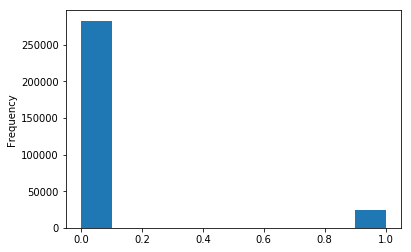

In [7]:
print(df['TARGET'].value_counts())
df['TARGET'].astype(int).plot.hist()